# QUESTION NO 1 

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
#reading data
data = pd.read_excel('dataset/Data.xlsx', header=None)

In [49]:
#preprocessing
data.columns = ['A1', 'A2', 'A3', 'A4']
X = data[['A1', 'A2', 'A3', 'A4']].values

In [50]:
#distance for k means
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [51]:
#distance for k medoids
def manhattan_distance(point1, point2):
    return np.sum(np.abs(point1 - point2))

In [52]:
#initializing centroids
def initialize_centroids(X, K):
    np.random.seed(0)
    return X[np.random.choice(X.shape[0], K, replace=False)]


In [53]:
#assigning each data point to the nearest cluster
def assign_clusters_kmeans(X, centroids):
    clusters = [[] for _ in range(len(centroids))]
    for idx, point in enumerate(X):
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster_idx = np.argmin(distances)
        clusters[cluster_idx].append(idx)
    return clusters


In [54]:
#using manhattan distance here instead of euclidean
def assign_clusters_manhattan(X, centroids):
    clusters = [[] for _ in range(len(centroids))]
    for idx, point in enumerate(X):
        distances = [manhattan_distance(point, centroid) for centroid in centroids]
        cluster_idx = np.argmin(distances)
        clusters[cluster_idx].append(idx)
    return clusters


In [55]:
#updating centroids
def calculate_new_centroids(X, clusters):
    centroids = np.zeros((len(clusters), X.shape[1]))
    for i, cluster in enumerate(clusters):
        if cluster:
            centroids[i] = np.mean(X[cluster], axis=0)
    return centroids


In [56]:
#updating medoids
def calculate_new_medoids(X, clusters):
    medoids = np.zeros((len(clusters), X.shape[1]))
    for i, cluster in enumerate(clusters):
        if cluster:
            distances = np.array([[manhattan_distance(X[p1], X[p2]) for p2 in cluster] for p1 in cluster])
            medoids[i] = X[cluster[np.argmin(distances.sum(axis=1))]]
    return medoids


In [57]:
#updating medians
def calculate_new_medians(X, clusters):
    medians = np.zeros((len(clusters), X.shape[1]))
    for i, cluster in enumerate(clusters):
        if cluster:
            medians[i] = np.median(X[cluster], axis=0)
    return medians


In [58]:
def k_means(X, K, max_iters=100):   #kmeans implementation
    centroids = initialize_centroids(X, K)
    for _ in range(max_iters):
        clusters = assign_clusters_kmeans(X, centroids)
        new_centroids = calculate_new_centroids(X, clusters)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    labels = np.concatenate([[i] * len(cluster) for i, cluster in enumerate(clusters)])
    return centroids, labels


In [59]:
def k_medoids(X, K, max_iters=100):        #kmedoids implementation
    medoids = initialize_centroids(X, K)
    for _ in range(max_iters):
        clusters = assign_clusters_manhattan(X, medoids)
        new_medoids = calculate_new_medoids(X, clusters)
        if np.all(medoids == new_medoids):
            break
        medoids = new_medoids
    labels = np.concatenate([[i] * len(cluster) for i, cluster in enumerate(clusters)])
    return medoids, labels


In [60]:
def k_median(X, K, max_iters=100):     #kmedian implementation
    medians = initialize_centroids(X, K)
    for _ in range(max_iters):
        clusters = assign_clusters_manhattan(X, medians)
        new_medians = calculate_new_medians(X, clusters)
        if np.all(medians == new_medians):
            break
        medians = new_medians
    labels = np.concatenate([[i] * len(cluster) for i, cluster in enumerate(clusters)])
    return medians, labels


In [61]:
#plotting scatter plots
def plot_clusters(X, centroids, labels, K, title):
    colors = plt.cm.get_cmap("inferno", K)
    for i in range(K):
        points = X[labels == i]
        plt.scatter(points[:, 0], points[:, 1], s=50, color=colors(i), label=f'Cluster {i+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='red', marker='X', label='Centroids/Medoids/Medians')
    plt.title(title)
    plt.xlabel("Feature A1")
    plt.ylabel("Feature A2")
    plt.legend()
    plt.show()


In [63]:
K = int(input("ENTER THE NUMBER OF CLUSTERS: "))

k_means_centroids, k_means_labels = k_means(X, K)
k_medoids_medoids, k_medoids_labels = k_medoids(X, K)
k_median_medians, k_median_labels = k_median(X, K)

In [43]:
data['K-means Cluster'] = k_means_labels
data['K-medoids Cluster'] = k_medoids_labels
data['K-median Cluster'] = k_median_labels

In [44]:
print("K-means cluster centers:\n", k_means_centroids)
print("K-medoids medoids:\n", k_medoids_medoids)
print("K-median medians:\n", k_median_medians)

K-means cluster centers:
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]]
K-medoids medoids:
 [[6.5 3.  5.2 2. ]
 [5.7 2.8 4.1 1.3]
 [5.  3.4 1.5 0.2]]
K-median medians:
 [[6.5  3.   5.3  1.9 ]
 [5.7  2.7  4.15 1.3 ]
 [5.   3.4  1.5  0.2 ]]


/var/folders/dz/tmzcb2_j20bbp4pjqn9xwlvw0000gn/T/ipykernel_8313/2160080605.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("inferno", K)


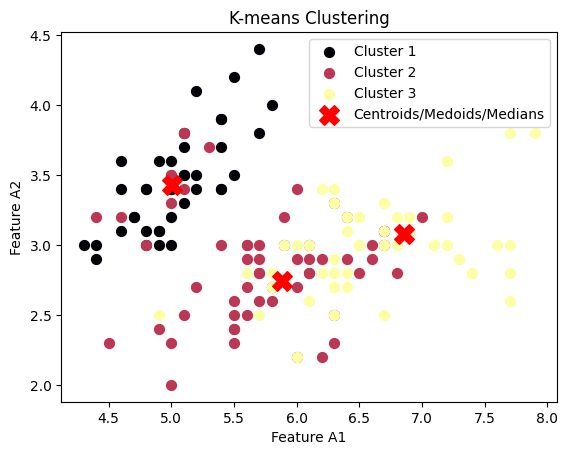

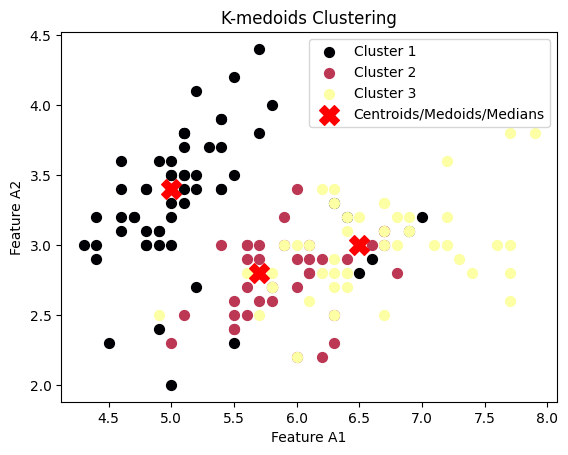

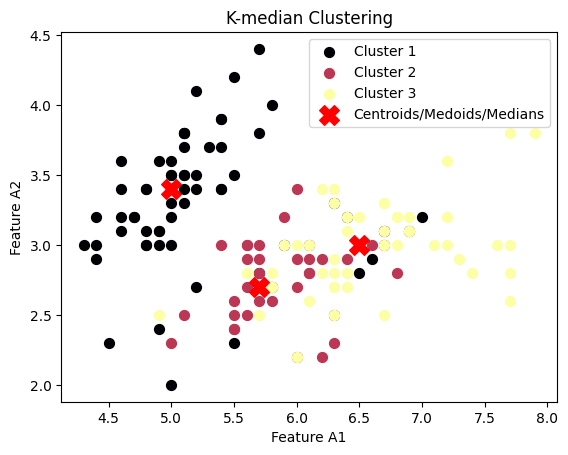

In [45]:
plot_clusters(X, k_means_centroids, k_means_labels, K, "K-means Clustering")
plot_clusters(X, k_medoids_medoids, k_medoids_labels, K, "K-medoids Clustering")
plot_clusters(X, k_median_medians, k_median_labels, K, "K-median Clustering")

In [65]:
print(data.columns)

Index(['A1', 'A2', 'A3', 'A4'], dtype='object')


In [66]:
!pip3 install openpyxl


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
